In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime

In [ ]:
import psutil
train_folder = [7554]#,7556,7557,7558,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
for j in train_folder:
    for i in range(1,2):
        url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
        data = pd.read_csv(url)
        #print(data.info())
        data.columns = data.columns.str.replace(' ', '')
        submit_time = data.iloc[-1][0]
        start_time = data.iloc[-2][0]
        data.dropna(inplace=True)
        data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
        data['X'] = data.X.astype(float)

        x = data.X.tolist()
        y = data.Y.tolist()

        fig=plt.figure(figsize=(5,3))
        ax=fig.add_subplot(111)

        plt.gca().invert_yaxis()
        ax.scatter(x,y,s=1,c='red')
        ax.set_xbound(lower=0.0, upper=1381)
        ax.set_ybound(lower=0.0, upper=925)

        plt.tight_layout()
        plt.show()

In [2]:
data = pd.read_csv(r'train/7554/SimpleTest/8.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          1185 non-null   object 
 1    Y         1183 non-null   float64
 2    Pressure  1183 non-null   float64
 3    TiltX     1183 non-null   float64
 4    TiltY     1183 non-null   float64
 5    Time      1183 non-null   object 
dtypes: float64(4), object(2)
memory usage: 55.7+ KB


In [4]:
print(data.columns)
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,910.472802864072,888.302113,0.094224,-3875.0,-351.0,00:05.8895936
1,910.472802864072,888.302113,0.099107,-3875.0,-351.0,00:05.9052263
2,910.472802864072,888.302113,0.123278,-3875.0,-351.0,00:05.9208500


In [5]:
data.columns = data.columns.str.replace(' ', '')

In [6]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)

In [7]:
data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
data['X'] = data.X.astype(float)

In [9]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY,Time
0,910.472803,888.302113,0.094224,-3875.0,-351.0,00:00:05.889593
1,910.472803,888.302113,0.099107,-3875.0,-351.0,00:00:05.905226
2,910.472803,888.302113,0.123278,-3875.0,-351.0,00:00:05.920850


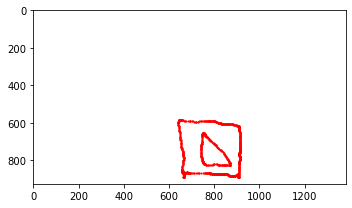

In [12]:
x = data.X.tolist()
y = data.Y.tolist()

fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

plt.gca().invert_yaxis()
ax.scatter(x,y,s=1,c='red')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)

plt.tight_layout()
plt.show()